# Import library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input


# Dataset get and preprocessing

In [17]:
#intailze variable
Image_size = 256
Batch_size = 32
Channel = 3
Epochs = 30

In [4]:
datasets = tf.keras.preprocessing.image_dataset_from_directory(
    "potato-village",
    shuffle = True,
    image_size=(Image_size,Image_size),
    batch_size=Batch_size,

)

Found 2698 files belonging to 3 classes.


In [5]:
class_name =datasets.class_names 
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

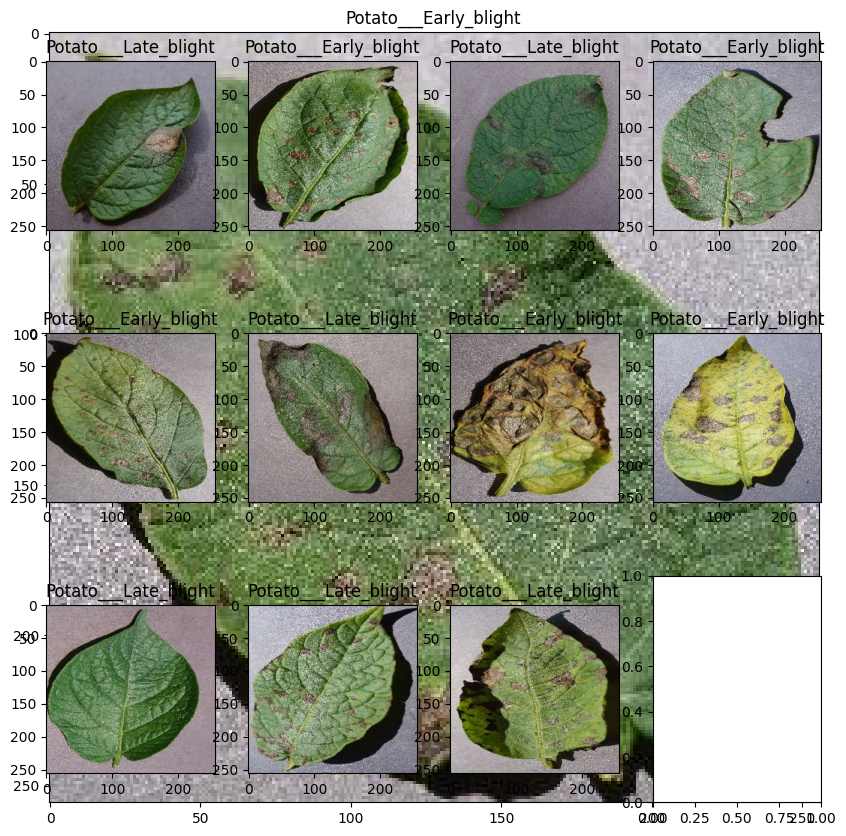

In [6]:
plt.figure(figsize=(10,10))
for ib, lb in datasets.take(1):
    for i in range(12):
        plt.imshow(ib[i].numpy().astype("uint8"))
        plt.title(class_name[lb[i]])
       
        plt.subplot(3,4,i+1)

In [7]:
#split datasets into train, test, and validation
def get_dataset_partitions_tf(datasets,train_split = 0.75,test_split =  0.15,validation_split = 0.1,shuffle =True,shuffle_size=1000):
    ds_size=len(datasets)
    train_size = int(train_split*ds_size)
    test_size = int(test_split*ds_size)
    vali_size = int(validation_split*ds_size)

    train_ds = datasets.take(train_size)
    test_ds = datasets.skip(train_size).take(test_size)
    validation_ds = datasets.skip(train_size).skip(test_size)
    return train_ds,test_ds,validation_ds

In [8]:
train_data,test_data,validation_data = get_dataset_partitions_tf(datasets)

In [9]:
len(train_data)
len(test_data)
len(validation_data)

10

In [10]:
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
test_data = test_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
validation_data = validation_data.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)

In [16]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(Image_size, Image_size),
    layers.Rescaling(1.0 / 255)
])


# Model build

In [23]:
model =Sequential([
   Input(shape=(Image_size,Image_size,Channel)),
   resize_and_rescale,
   layers.Conv2D(32,(3,3),activation="relu"),
   layers.MaxPooling2D((2,2)),
   
   layers.Conv2D(32,(3,3),activation = "relu"),
   layers.MaxPooling2D((2,2)),
 
   layers.Conv2D(32,(3,3),activation = "relu"),
   layers.MaxPooling2D((2,2)),

   layers.Flatten(),
   Dense(64,activation="relu"),
   Dense(3,activation="softmax")

]
)


In [26]:
model.build()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     1,843,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,862,851 (7.11 MB)

 Trainable params: 1,862,851 (7.11 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [33]:
model_train = model.fit(
     train_data,
     epochs = Epochs,
     batch_size =Batch_size,
     validation_data = validation_data
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 317s 3s/step - accuracy: 0.5427 - loss: 0.9594 - val_accuracy: 0.7349 - val_loss: 0.6185
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.6848 - loss: 0.6851 - val_accuracy: 0.7282 - val_loss: 0.5963
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.7500 - loss: 0.5622 - val_accuracy: 0.7248 - val_loss: 0.6266
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.7389 - loss: 0.5368 - val_accuracy: 0.7181 - val_loss: 0.5778
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.7599 - loss: 0.4898 - val_accuracy: 0.6477 - val_loss: 0.6172
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 62s 981ms/step - accuracy: 0.7646 - loss: 0.4631 - val_accuracy: 0.6711 - val_loss: 0.6809
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.7862 - loss: 0.4285 - val_accuracy: 0.7819 - val_loss: 0.6800
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.7990 - loss: 0.3993 - val_accuracy: 0.6980 - val_l

In [34]:
scores = model.evaluate(test_data)

12/12 ━━━━━━━━━━━━━━━━━━━━ 58s 335ms/step - accuracy: 0.6515 - loss: 0.8995


In [36]:
model_train.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [39]:
model_train.history["accuracy"]

[0.6294642686843872,
 0.711309552192688,
 0.7371031641960144,
 0.7420634627342224,
 0.7564483880996704,
 0.7683531641960144,
 0.7748016119003296,
 0.778769850730896,
 0.7891865372657776,
 0.7822420597076416,
 0.7872023582458496,
 0.8020833134651184,
 0.80307537317276,
 0.80307537317276,
 0.8020833134651184,
 0.8060516119003296,
 0.8070436716079712,
 0.8115079402923584,
 0.8085317611694336,
 0.7991071343421936,
 0.8045634627342224,
 0.8125,
 0.7976190447807312,
 0.8035714030265808,
 0.8120039701461792,
 0.8110119104385376,
 0.8080357313156128,
 0.7996031641960144,
 0.807539701461792,
 0.7976190447807312]

# Predication

first image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
predict label: Potato___Late_blight


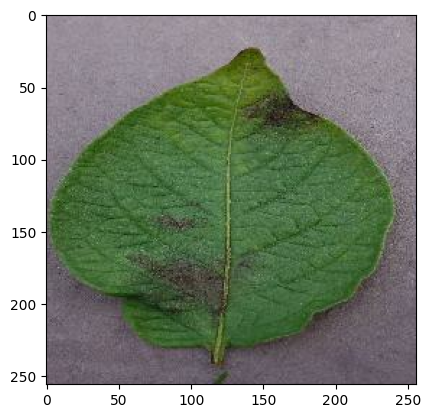

In [94]:

print("first image to predict")
for ib,lb in test_data.take(1):
    first_image = ib[0].numpy().astype("uint8")
    first_label = lb[0].numpy()
    plt.imshow(first_image)
print("actual label:",class_name[first_label])
batch_prediction = model.predict(ib)
print("predict label:",class_name[np.argmax(batch_prediction[0])])

In [95]:
def predict(model, img, class_names):
    image_array = tf.keras.preprocessing.image.img_to_array(img)
    image_array = tf.expand_dims(image_array, 0)  # Add batch dimension
    # Predict the class probabilities
    predictions = model.predict(image_array)
    
    # Get the predicted class
    predicted_class = class_names[np.argmax(predictions[0])]
    
    return predicted_class

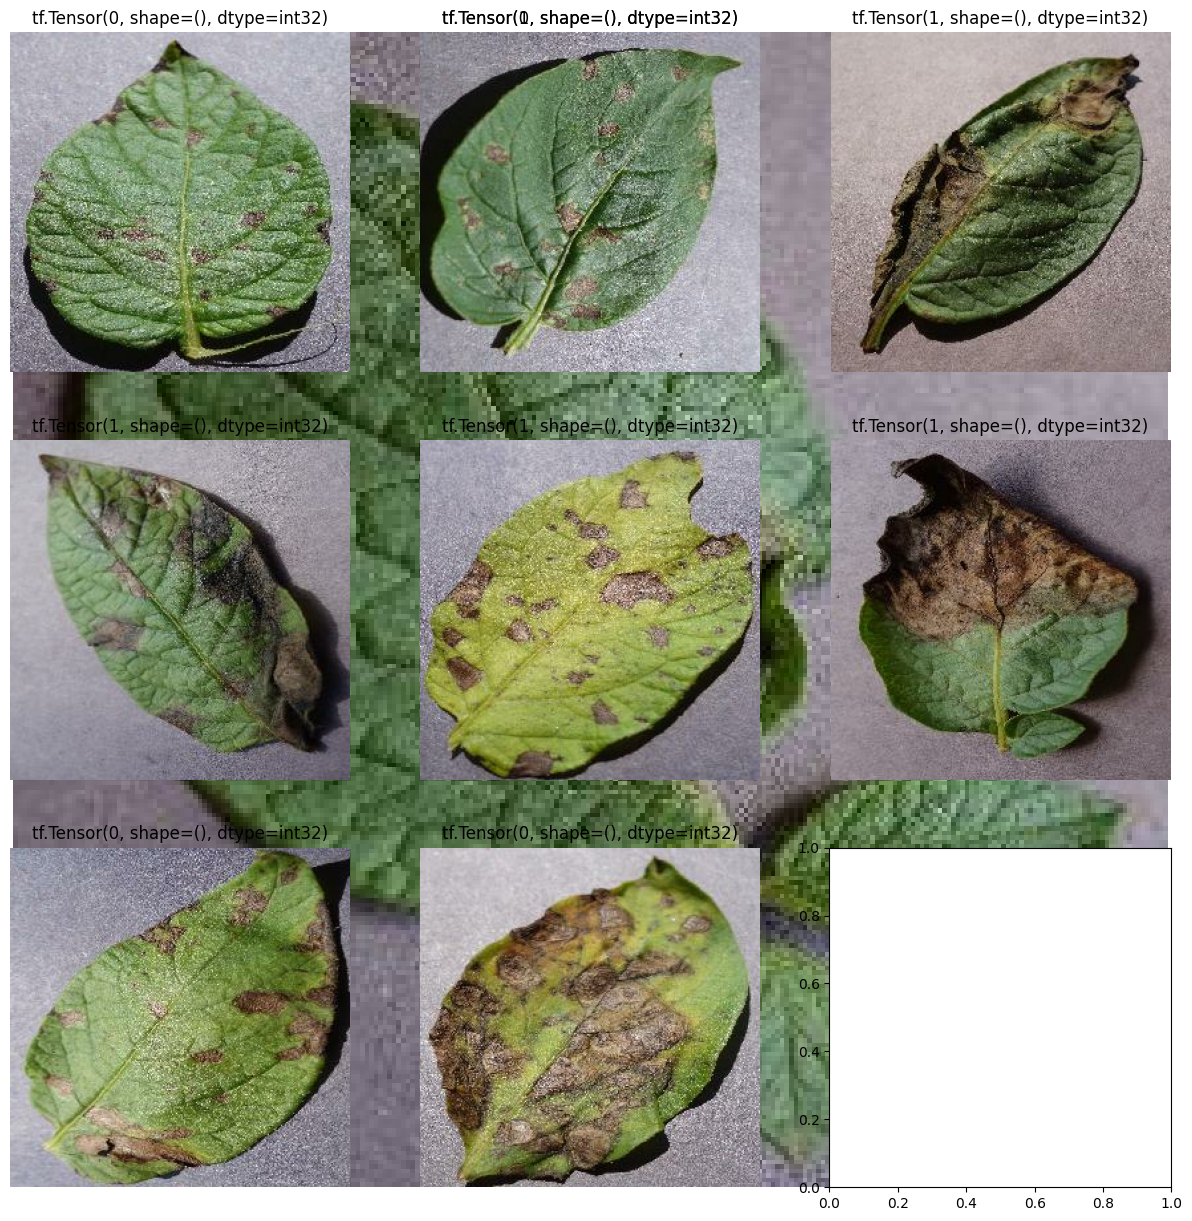

In [105]:
plt.figure(figsize=(15,15))
for ib, lb in test_data.take(1):
    for i in range(9):
        plt.imshow(ib[i].numpy().astype("uint8"))
        plt.title(lb[i])
        plt.axis("off")
        plt.subplot(3,3,i+1)